In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

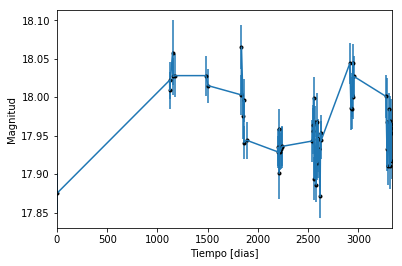

In [2]:
data = np.genfromtxt('LC_23309_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

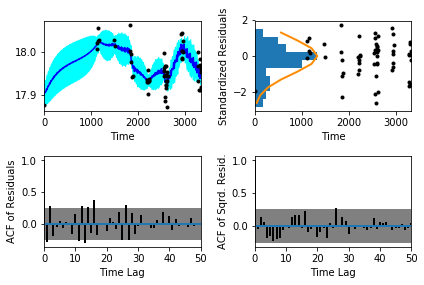

In [5]:
sample.assess_fit()

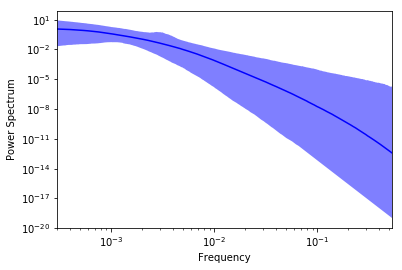

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,0.0554202,'Medida del nivel de ruido')

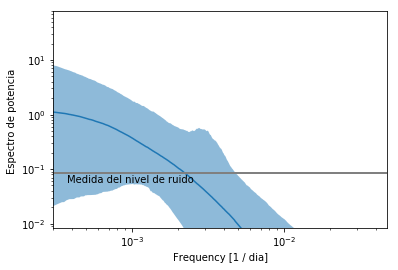

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

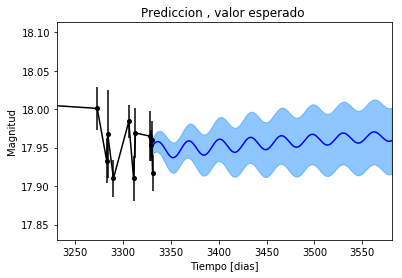

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

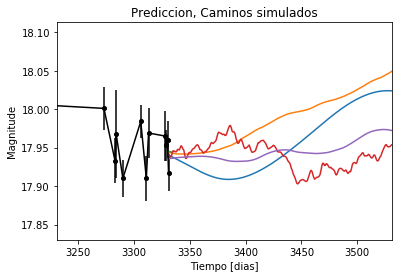

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


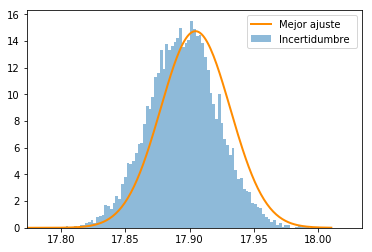

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

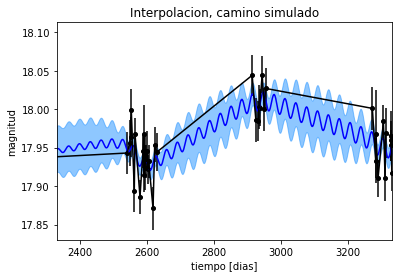

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

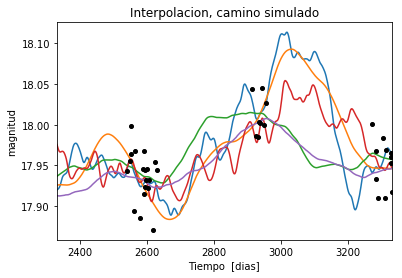

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1299.51227271
Median: 0.00955939890438
Standard deviation: 0.202597582735
68% credibility interval: [ 0.0008495   0.18400191]
95% credibility interval: [  3.49090956e-04   8.23176280e-01]
99% credibility interval: [  3.10128016e-04   9.96659458e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1610.58491175
Median: 0.00208958672832
Standard deviation: 0.099844433395
68% credibility interval: [ 0.00049388  0.03168366]
95% credibility interval: [ 0.00032827  0.30555416]
99% credibility interval: [  3.06269060e-04   7.94583235e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 538.575630212
Median: 0.0168926430306
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1430.37420317
Median: 145.601148702
Standard deviation: 1.52743372544
68% credibility interval: [ 143.85500125  146.59451905]
95% credibility interval: [ 141.37694868  147.15372129]
99% credibility interval: [ 139.20374987  147.43134814]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 713.693352658
Median: 0.603347114367
Standard deviation: 2.33954065545
68% credibility interval: [ 0.05050793  4.04790642]
95% credibility interval: [ 0.01369556  7.7646755 ]
99% credibility interval: [  9.53925869e-03   1.17405345e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 870.532462331
Median: 0.374687798136
Standard deviation: 10.3100511295
68% credibility interval: [  9.26603455e-03   1.00095409e+01]
95% credibility interv

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.3887583
Median: 6.43444912378e-35
Standard deviation: 3.49509188442e+109
68% credibility interval: [  1.21884236e-79   2.02098829e-02]
95% credibility interval: [  5.77769198e-139   7.31937491e+077]
99% credibility interval: [  2.29459027e-148   1.32063294e+096]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2164.51840285
Median: 17.9659943886
Standard deviation: 0.0292152598544
68% credibility interval: [ 17.94043265  17.98716995]
95% credibility interval: [ 17.90080461  18.01782872]
99% credibility interval: [ 17.86405019  18.05552916]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 463.451552051
Median: 0.00475592589163
Standard deviation: 0.257355607005
68% credibility interval: [ 0.          0.38797844]
95% credibility interval: [ 0.          0.94107413]
99% credibility interval: [ 0.          1.02395143]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 463.451552051
Median: 0.00475592589163
Standard deviation: 0.257355607005
68% credibility interval: [ 0.          0.38797844]
95% credibility interval: [ 0.          0.94107413]
99% credibility interval: [ 0.          1.02395143]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 696.373010991
Median: 0.0
Standard deviation: 0.000752461302496
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1430.37420317
Median: 145.601148702
Standard deviation: 1.52743372544
68% credibility interval: [ 143.85500125  146.59451905]
95% credibility interval: [ 141.37694868  147.15372129]
99% credibility interval: [ 139.20374987  147.43134814]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2836.14165862
Median: 0.00281068085158
Standard deviation: 0.00411777689231
68% credibility interval: [ 0.00155145  0.00563657]
95% credibility interval: [ 0.00092367  0.01315324]
99% credibility interval: [ 0.00064689  0.02461053]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2469.29097431
Median: 1.06842454103
Standard deviation: 0.164498821747
68% credibility interval: [ 0.92230171  1.24227742]
95% credibility interval: [ 0.80567296  1.44884791]
99% credibility interval: [ 0.72729525  1.5938019 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 524.88309662
Median: 3.60387329463e-05
Standard deviation: 0.0719928479064
68% credibility interval: [  1.11307731e-07   2.39508794e-03]
95% credibility interval: [  3.42974121e-80   1.15143137e-01]
99% credibility interval: [  2.14767157e-101   4.54770607e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1299.51227271
Median: (-0.0600634747415+0j)
Standard deviation: 2.05794883451
68% credibility interval: [-1.15611812-0.68858901j -0.00533759-0.10795019j]
95% credibility interval: [ -5.17216911e+00+0.j          -2.19340317e-03-0.02261101j]
99% credibility interval: [ -6.26219606e+00+0.j          -1.94859179e-03-0.00931422j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1610.58491175
Median: (-0.0131292606295+1.71820278349j)
Standard deviation: 1.73444162991
68% credibility interval: [-0.19907430+0.95568312j -0.00310314+0.j        ]
95% credibility interval: [-1.91985342+1.47734036j -0.00206259+0.j        ]
99% credibility interval: [ -4.99251371e+00+0.j  -1.92434526e-03+0.j]
Posterior summary for parameter ar_roots  